In [24]:
from pymongo import MongoClient
import pandas as pd

def query_to_dataframe(query, database):
    '''
    custom function to create a dataframe of query results
    from the weather_data
    '''
    
    client = MongoClient(host="localhost", port=27017)
    weather_data = client.pitds_weather_data[database]
    
    entries = []
    for entry in weather_data.find(query):
        entries.append(entry)
      
    if len(entries)==0: # no hits for the query
        return None
    else:
        return pd.DataFrame(entries).drop(columns=["_id"])

- will start by explloring recent data. 2019 data is considered provisional and is only available for 4 months
- 2018 data is chosen instead

In [26]:
w_2018 = query_to_dataframe({"year":2018}, "weather_data").drop(columns=["index"])

In [27]:
w_2018.head()

,af_days,month,rain_mm,station_name,sun_hours,tmax_degC,tmin_degC,year
0,0.0,1.0,117.2,aberporth,53.5,8.4,3.8,2018.0
1,10.0,2.0,48.6,aberporth,91.3,6.3,1.3,2018.0
2,6.0,3.0,97.0,aberporth,100.6,7.7,2.3,2018.0
3,0.0,4.0,70.6,aberporth,152.2,12.1,6.4,2018.0
4,0.0,5.0,33.4,aberporth,219.4,15.3,8.1,2018.0


In [7]:
w_2018.sun_hours.astype("category")
w_2018.describe()

,af_days,month,rain_mm,sun_hours,tmax_degC,tmin_degC,year
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.0
mean,3.117647,6.500000,71.483333,388.166667,13.777941,6.622059,2018.0
std,4.790027,3.456291,44.772683,400.370813,5.696825,4.204140,0.0
min,0.000000,1.000000,0.400000,11.300000,3.300000,-2.500000,2018.0
25%,0.000000,3.750000,40.625000,89.025000,8.800000,3.000000,2018.0
50%,0.000000,6.500000,62.900000,173.050000,13.300000,6.500000,2018.0
75%,5.000000,9.250000,88.150000,1000.000000,18.500000,9.900000,2018.0
max,24.000000,12.000000,262.800000,1000.000000,28.300000,16.400000,2018.0


- sun_hours contains missing values. Explore futher to identify the stations and months with missing values
- data from other features seem to be within the expected range, with no missing values

In [5]:
w_2018[w_2018.sun_hours==1000]

,af_days,month,rain_mm,station_name,sun_hours,tmax_degC,tmin_degC,year
24,6.0,1.0,198.2,ballypatrick,1000.0,6.4,1.9,2018.0
25,9.0,2.0,80.6,ballypatrick,1000.0,5.5,0.8,2018.0
26,7.0,3.0,110.6,ballypatrick,1000.0,6.3,1.3,2018.0
27,3.0,4.0,73.6,ballypatrick,1000.0,10.6,4.5,2018.0
28,0.0,5.0,53.8,ballypatrick,1000.0,16.0,7.3,2018.0
29,0.0,6.0,49.0,ballypatrick,1000.0,18.0,9.3,2018.0
30,0.0,7.0,78.6,ballypatrick,1000.0,17.9,11.3,2018.0
31,0.0,8.0,125.6,ballypatrick,1000.0,16.5,10.6,2018.0
32,0.0,9.0,80.0,ballypatrick,1000.0,14.5,8.5,2018.0
33,1.0,10.0,95.4,ballypatrick,1000.0,11.9,6.7,2018.0


In [3]:
# stations missing sun-hours data
w_2018[w_2018.sun_hours==1000].station_name.unique()

array(['ballypatrick', 'braemar', 'cambridge', 'cardiff', 'chivenor',
       'dunstaffnage', 'durham', 'newtonrigg', 'suttonbonington',
       'wickairport'], dtype=object)

In [4]:
# of missing entires for each station 
missing = {}
for name in w_2018[w_2018.sun_hours==1000].station_name:
    if name in missing.keys():
        missing[name] += 1
    else:
        missing[name] = 0

missing

{'ballypatrick': 11,
 'braemar': 11,
 'cambridge': 11,
 'cardiff': 11,
 'chivenor': 11,
 'dunstaffnage': 11,
 'durham': 11,
 'newtonrigg': 11,
 'suttonbonington': 11,
 'wickairport': 11}

It appears that these 10 stations did not report any sun_hours data for 2018. 
Will attempt to fill up this data with historical average data (if any). The strategey is to average the data of most recently available data from three fill years. This is assuming that the average number of sun hours at a given stations is stable over the years.

In [5]:
# Get tow most recently available years of data
def get_fill_years(station, years_to_check):
    
    years = []
    
    # check 20 years into the past
    for year in range(-2018, years_to_check-2018):
        
        # print(-year, station) # Debugging
        
        df = query_to_dataframe({"station_name":station, "year":-year})
        
        # check for any entries
        if df is None:
            pass
        else:
            if len(df[df.sun_hours<1000])==12:
                years.append(-year)
            
        if len(years)>=3: # number of fill years to consider
            break
                    
    return years


In [6]:
fill_years = {}
for station in missing.keys():
    fill_years[station] = get_fill_years(station, years_to_check=60)
    
fill_years

{'ballypatrick': [1990, 1989, 1988],
 'braemar': [2004, 2003, 2002],
 'cambridge': [2009, 2008, 2007],
 'cardiff': [1995, 1994, 1993],
 'chivenor': [1970, 1968, 1967],
 'dunstaffnage': [2001, 2000, 1999],
 'durham': [1998, 1997, 1996],
 'newtonrigg': [1980, 1979, 1978],
 'suttonbonington': [1999, 1998, 1997],
 'wickairport': [1992, 1991, 1990]}

In [7]:
## Fill in missing values for 2018 using fill data from the identified fill years

def get_fill_values(station, fill_years):
    '''
    custom function to calculate the average number of sun hours across the
    specified fill years for each month
    '''
    count = 0 # index through the fill years
    
    # cummulatively sum up values from fill years
    for year in fill_years:
        
        df = query_to_dataframe({"station_name":station, "year":year})
        
        if count == 0:   
            values = pd.concat([df.sun_hours, df.month], axis=1).set_index("month")
            
        else:
            values = values + pd.concat([df.sun_hours, df.month], axis=1).set_index("month")
            
    return values/len(fill_years) # divide by number of fill years to get average

In [10]:
# check fill values calculated for wickairport
get_fill_values('wickairport', fill_years['wickairport'])

,sun_hours
month,
1.0,20.266667
2.0,26.633333
3.0,30.500000
4.0,62.733333
5.0,67.800000
6.0,34.433333
7.0,71.333333
8.0,49.566667
9.0,35.400000


In [8]:
def fill_sun_hours():
    ''' Fill in missing values for sun hours'''
    for station in missing.keys():
        df_slice = w_2018[w_2018.station_name==station].sun_hours.index
        values = get_fill_values(station, fill_years[station])
    
        for i in range(0, len(df_slice)):
            val = values.iloc[i]
            w_2018.set_value(col="sun_hours",index=df_slice[i],value=val)


In [9]:
fill_sun_hours()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [10]:
# updated dataframe does not have missing values
w_2018.describe()

,af_days,month,rain_mm,sun_hours,tmax_degC,tmin_degC,year
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.0
mean,3.117647,6.500000,71.483333,104.966258,13.777941,6.622059,2018.0
std,4.790027,3.456291,44.772683,77.248584,5.696825,4.204140,0.0
min,0.000000,1.000000,0.400000,1.866667,3.300000,-2.500000,2018.0
25%,0.000000,3.750000,40.625000,45.425000,8.800000,3.000000,2018.0
50%,0.000000,6.500000,62.900000,79.200000,13.300000,6.500000,2018.0
75%,5.000000,9.250000,88.150000,147.375000,18.500000,9.900000,2018.0
max,24.000000,12.000000,262.800000,339.700000,28.300000,16.400000,2018.0


In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [13]:
data = w_2018.copy(deep=True)
grouped = data.groupby("station_name")
grouped.describe()

af_days                                                   \
                  count       mean       std  min  25%  50%    75%   max   
station_name                                                               
aberporth          12.0   1.333333  3.228660  0.0  0.0  0.0   0.00  10.0   
armagh             12.0   2.750000  3.816829  0.0  0.0  1.5   3.00  11.0   
ballypatrick       12.0   2.166667  3.298301  0.0  0.0  0.0   3.75   9.0   
bradford           12.0   3.333333  4.923660  0.0  0.0  0.5   6.25  13.0   
braemar            12.0  10.083333  8.826183  0.0  2.5  9.0  15.25  24.0   
camborne           12.0   0.833333  1.749459  0.0  0.0  0.0   0.25   5.0   
cambridge          12.0   2.916667  5.053502  0.0  0.0  0.5   3.00  17.0   
cardiff            12.0   2.833333  4.549392  0.0  0.0  0.5   3.75  14.0   
chivenor           12.0   1.833333  2.918073  0.0  0.0  0.0   2.50   8.0   
dunstaffnage       12.0   2.333333  3.498918  0.0  0.0  0.5   3.25   9.0   
durham             12.0   4.083333  5.775471  0.0  0.0  1.5   5.75  18.0   
eastbourne         12.0   1.000000  2.486326  0.0  0.0  0.0   0.00   8.0   
eskdalemuir        12.0   7.000000  7.458979  0.0  1.5  3.5  11.25  22.0   
heathrow           12.0   1.916667  3.604501  0.0  0.0  0.5   1.25  12.0   
hurn               12.0   4.166667  5.890413  0.0  0.0  2.0   6.25  20.0   
lerwick            12.0   2.250000  3.519427  0.0  0.0  0.0   3.50   9.0   
leuchars           12.0   5.000000  6.281285  0.0  0.0  2.0  11.50  16.0   
lowestoft          12.0   2.083333  3.396745  0.0  0.0  0.5   2.25  10.0   
manston            12.0   1.416667  3.117643  0.0  0.0  0.0   0.25   9.0   
nairn              12.0   5.583333  6.067174  0.0  0.0  3.5  11.25  16.0   
newtonrigg         12.0   5.250000  5.801646  0.0  0.0  5.0   6.00  17.0   
oxford             12.0   2.666667  4.052683  0.0  0.0  1.5   3.25  14.0   
paisley            12.0   3.750000  4.750598  0.0  0.0  1.5   8.50  12.0   
rossonwye          12.0   3.083333  4.055486  0.0  0.0  1.5   4.50  12.0   
shawbury           12.0   4.416667  5.900051  0.0  0.0  2.0   6.00  17.0   
sheffield          12.0   2.000000  3.247377  0.0  0.0  0.5   2.25  10.0   
stornoway          12.0   2.416667  3.752777  0.0  0.0  0.0   3.00  10.0   
suttonbonington    12.0   2.833333  4.195958  0.0  0.0  0.5   4.25  12.0   
tiree              12.0   1.000000  1.858641  0.0  0.0  0.0   1.25   6.0   
valley             12.0   2.000000  3.330302  0.0  0.0  0.0   2.50  10.0   
waddington         12.0   2.833333  5.573204  0.0  0.0  0.0   2.25  18.0   
whitby             12.0   2.416667  3.728474  0.0  0.0  0.0   4.25  10.0   
wickairport        12.0   3.083333  4.144182  0.0  0.0  0.5   5.25  12.0   
yeovilton          12.0   3.333333  4.716187  0.0  0.0  1.0   4.50  15.0   

                month       ... tmin_degC        year                       \
                count mean  ...       75%   max count    mean  std     min   
station_name                ...                                              
aberporth        12.0  6.5  ...    11.200  13.4  12.0  2018.0  0.0  2018.0   
armagh           12.0  6.5  ...     8.700  11.9  12.0  2018.0  0.0  2018.0   
ballypatrick     12.0  6.5  ...     8.700  11.3  12.0  2018.0  0.0  2018.0   
bradford         12.0  6.5  ...     9.600  12.6  12.0  2018.0  0.0  2018.0   
braemar          12.0  6.5  ...     6.450   9.8  12.0  2018.0  0.0  2018.0   
camborne         12.0  6.5  ...    12.225  14.3  12.0  2018.0  0.0  2018.0   
cambridge        12.0  6.5  ...     9.800  13.6  12.0  2018.0  0.0  2018.0   
cardiff          12.0  6.5  ...    10.750  14.7  12.0  2018.0  0.0  2018.0   
chivenor         12.0  6.5  ...    11.500  14.0  12.0  2018.0  0.0  2018.0   
dunstaffnage     12.0  6.5  ...     9.300  11.8  12.0  2018.0  0.0  2018.0   
durham           12.0  6.5  ...     9.250  12.1  12.0  2018.0  0.0  2018.0   
eastbourne       12.0  6.5  ...    12.025  15.8  12.0  2018.0  0.0  2018.0   
eskdalemuir      12.0  6.5  ...  

In [38]:
jan = w_2018[w_2018.month == 1]
jan

,af_days,month,rain_mm,station_name,sun_hours,tmax_degC,tmin_degC,year
0,0.0,1.0,117.2,aberporth,53.500000,8.4,3.8,2018.0
12,6.0,1.0,127.1,armagh,51.100000,7.2,1.8,2018.0
24,6.0,1.0,198.2,ballypatrick,17.266667,6.4,1.9,2018.0
36,6.0,1.0,107.8,bradford,42.100000,6.9,2.4,2018.0
48,19.0,1.0,64.0,braemar,11.200000,3.9,-1.8,2018.0
60,0.0,1.0,176.2,camborne,56.700000,10.2,5.7,2018.0
72,7.0,1.0,47.4,cambridge,22.066667,8.5,2.4,2018.0
84,9.0,1.0,153.2,cardiff,11.833333,9.4,2.7,2018.0
96,4.0,1.0,94.4,chivenor,18.500000,9.8,4.1,2018.0
108,8.0,1.0,213.8,dunstaffnage,10.733333,7.0,2.0,2018.0


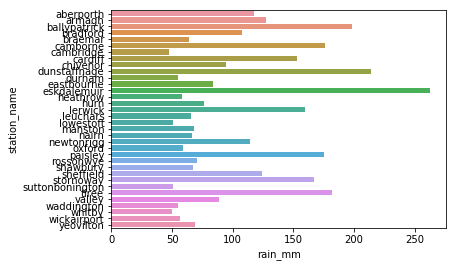

In [23]:
sns.barplot(data=jan, x="rain_mm", y="station_name")

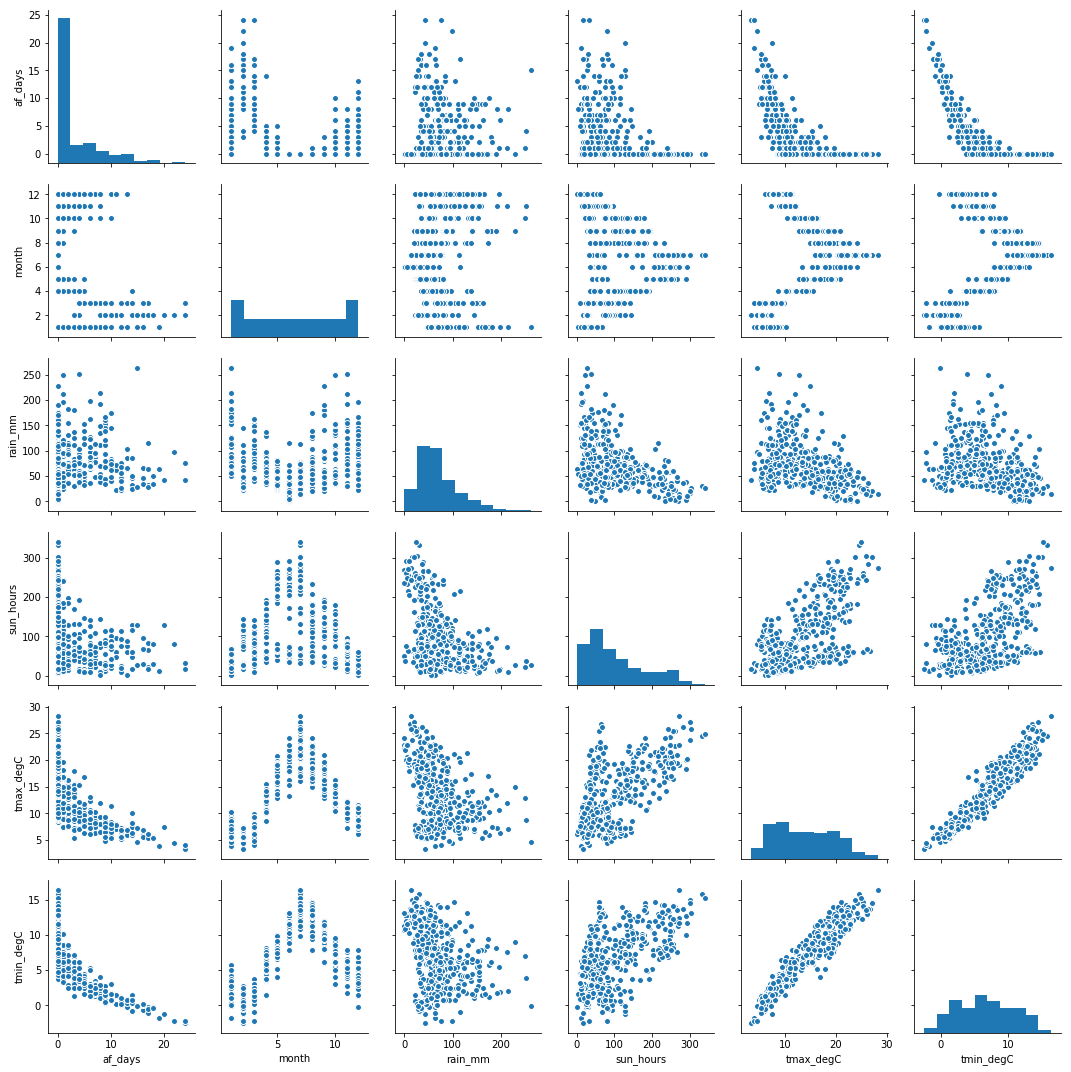

In [38]:
sns.pairplot(w_2018.drop(columns=["year"], inplace=False))

# Part 1 - clustering

## clustering with KMeans using all weather readings

In [12]:
def print_cluster(group, label, clustred):
    
    print("\n", "Cluster", label, "\n")
    for i in group:
        print(clustred.station_name.loc[i])


In [13]:
def get_month_clusters(num_clusters, month):
    '''
    Find clusters using only data from a specific month
    '''
    mon_data = w_2018[w_2018.month == month]
    mon_data.set_index("station_name", inplace=True)
    clf = KMeans(n_clusters=num_clusters, random_state=1000)
    clf.fit(mon_data)

    mon_data = w_2018[w_2018.month == month]
    clustred = pd.concat([pd.Series(mon_data.station_name.values, name="station_name"), 
                          pd.Series(clf.labels_, name="labels")], axis=1)
    groups = clustred.groupby("labels").groups
    
    for i in range(0, len(groups)):
        print_cluster(groups[i], i, clustred)

In [16]:
# Discover clusters using data from a specific month
for i in range(3,4):
    print("\nusing", i, " clusters:")
    get_month_clusters(num_clusters=i, month=12) #clusters based on a specific month


using 3  clusters:

 Cluster 0 

bradford
braemar
cambridge
durham
heathrow
leuchars
lowestoft
manston
nairn
newtonrigg
oxford
rossonwye
shawbury
suttonbonington
waddington
whitby
wickairport

 Cluster 1 

ballypatrick
camborne
cardiff
dunstaffnage
eskdalemuir

 Cluster 2 

aberporth
armagh
chivenor
eastbourne
hurn
lerwick
paisley
sheffield
stornoway
tiree
valley
yeovilton


In [18]:
# Aggregate 2018 data into annual averages and discover clusters
def get_clusters(num_clusters, data):
    '''
    Get clusters using average weather data
    '''
    clf = KMeans(n_clusters=num_clusters, random_state=1000)
    clf.fit(data)

    clustred = pd.concat([pd.Series(data.index.values, name="station_name"), 
                          pd.Series(clf.labels_, name="labels")], axis=1)
    groups = clustred.groupby("labels").groups
    
    for i in range(0, len(groups)):
        print_cluster(groups[i], i, clustred)
        
        
stations = w_2018.station_name.unique()
averages = []

for station in stations:
    station_avg = pd.Series(w_2018[w_2018.station_name == station].mean(), name=station)
    averages.append(station_avg)

# Calculate average weather data for 2018
avg_df = pd.concat(averages, axis=1)
avg_df.drop(index=["year","month"], inplace=True)
avg_df = avg_df.transpose()

get_clusters(num_clusters=3, data=avg_df)


 Cluster 0 

armagh
bradford
eastbourne
heathrow
hurn
leuchars
lowestoft
manston
nairn
oxford
rossonwye
shawbury
sheffield
valley
waddington
whitby
yeovilton

 Cluster 1 

ballypatrick
braemar
cambridge
cardiff
chivenor
dunstaffnage
durham
newtonrigg
suttonbonington
wickairport

 Cluster 2 

aberporth
camborne
eskdalemuir
lerwick
paisley
stornoway
tiree


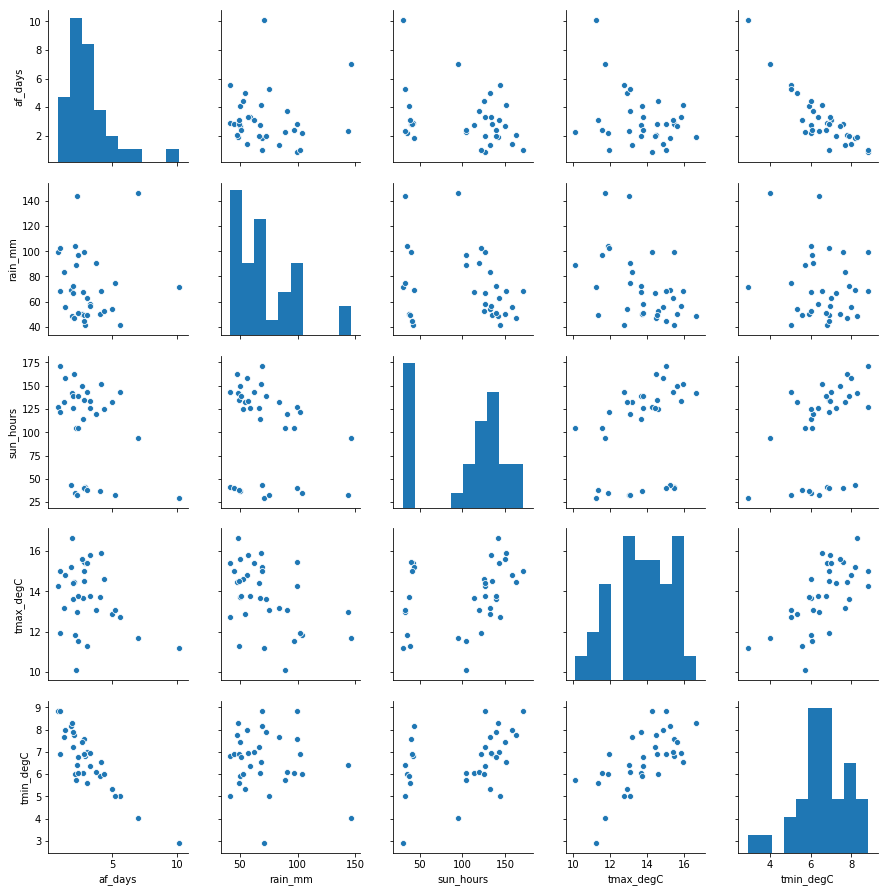

In [183]:
# visualize averaged data
sns.pairplot(avg_df)

strong correlations would be expected
- af_days and t_min i.e lower minimum temperatures are associated with more frost days
- tmax and t_min i.e stations with low minimum temperatures are also likely to have low maximum temperatures and vice versa.

## visualize discovered clusters

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


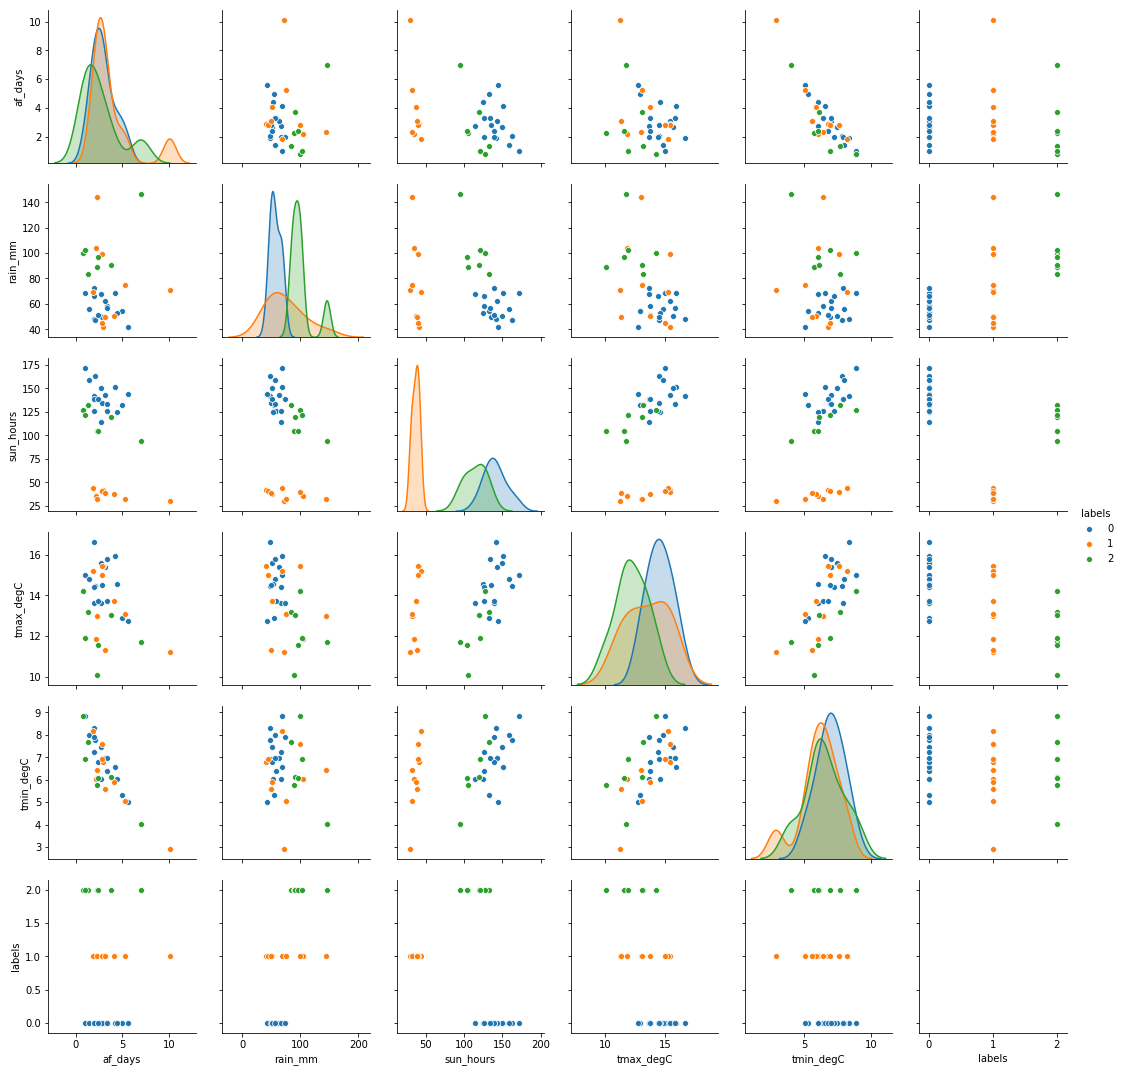

In [28]:
## Using 3 clusters
clf = KMeans(n_clusters=3, random_state=1000) 
clf.fit(avg_df)

clustred = pd.concat([avg_df, pd.Series(clf.labels_, name="labels",index=avg_df.index)], axis=1)
sns.pairplot(data=clustred, hue="labels")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


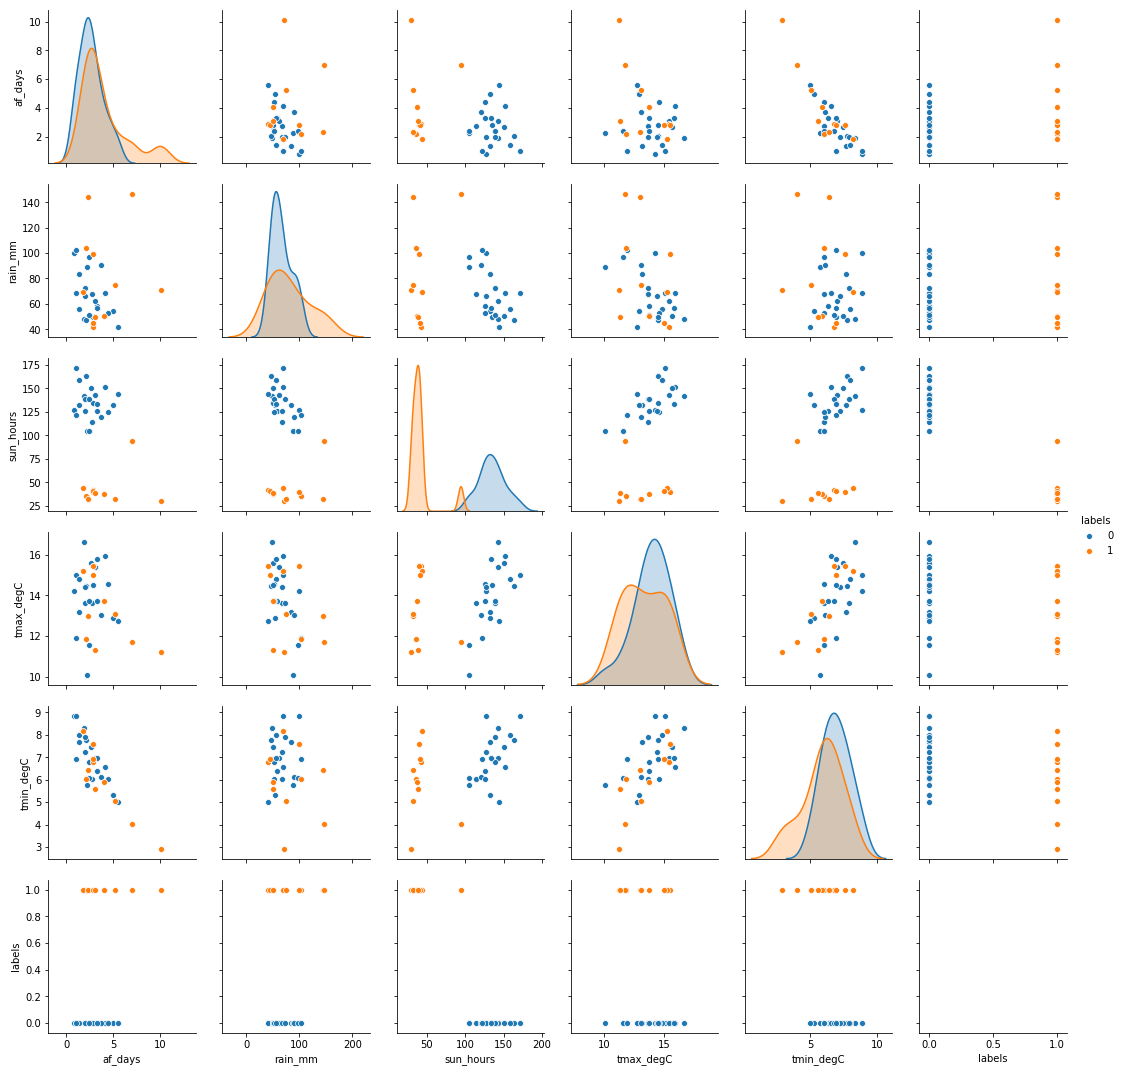

In [29]:
## Using 2 clusters
clf = KMeans(n_clusters=2, random_state=1000) 
clf.fit(avg_df)

clustred = pd.concat([avg_df, pd.Series(clf.labels_, name="labels",index=avg_df.index)], axis=1)
sns.pairplot(data=clustred, hue="labels")

Two clusters appears to be a more reasonable choice than three clusters. 
Clusters are mainly driven by the number of sun hours recorded.

# Part 2 - Classification

In [52]:
print("number of stations with 2018 data: ", len(w_2018.station_name.unique()))

# Average weather data for 2018
avg_df

number of stations with 2018 data:  34


,af_days,rain_mm,sun_hours,tmax_degC,tmin_degC
aberporth,1.333333,83.683333,132.400000,13.166667,7.683333
armagh,2.750000,67.458333,114.141667,13.650000,6.033333
ballypatrick,2.166667,103.833333,35.252778,11.841667,6.016667
bradford,3.333333,58.483333,126.133333,13.741667,6.366667
braemar,10.083333,71.308333,29.852778,11.208333,2.908333
camborne,0.833333,99.683333,126.883333,14.241667,8.825000
cambridge,2.916667,41.483333,41.833333,15.425000,6.800000
cardiff,2.833333,99.300000,39.819444,15.433333,7.575000
chivenor,1.833333,69.116667,43.766667,15.200000,8.175000
dunstaffnage,2.333333,143.941667,32.313889,12.983333,6.425000


In [55]:
# labeled station data
labled_data = query_to_dataframe({}, "station_cordinates")
print("Total number of stations: ",len(labled_data))
labled_data = labled_data.set_index("station")
labled_data


Total number of stations:  37


,label,latitude,longitude
station,,,
aberporth,-1.0,52.139,-4.570
armagh,0.0,54.352,-6.649
ballypatrick,0.0,55.181,-6.153
bradford,0.0,53.813,-1.772
braemar,0.0,57.006,-3.396
camborne,-1.0,50.218,-5.327
cambridge,-1.0,52.245,0.102
cardiff,-1.0,51.488,-3.187
chivenor,-1.0,51.089,-4.147


In [58]:
# Drop stations that do not have 2018 data
to_drop = []
for station in labled_data.index:
    if not station in avg_df.index:
        to_drop.append(station)
        print("dropped: ",station)
        
labled_data.drop(index=to_drop, inplace=True)

dropped:  cwmystwyth
dropped:  ringway
dropped:  southampton


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np

In [59]:
X = np.array(avg_df)
y = np.array(labled_data.label)

# Randomly select five stations to be part of the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=1000)

In [63]:
# verify size of training a s test sets. 
print(X_train.shape)
print(X_test.shape)

(29, 5)
(5, 5)


In [66]:
# Fit and evaluate a gaussioan naive bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [68]:
# check accuracy score on training set
clf.score(X_train, y_train)

0.8620689655172413

In [70]:
# check accuracy score in test set
clf.score(X_test, y_test)

0.6

In [96]:
# remove highly correlated features and reevaluate accuracy score
# tmin_degC is highly correlated with both tmax_degC and af_days
# PErformance is expected to improve because of naive bayes' conditional feature independence assumption

X = np.array(avg_df.drop(columns=["tmin_degC"]))
y = np.array(labled_data.label)

# Randomly select five stations to be part of the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=1000)

# Fit and evaluate a gaussioan naive bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# check accuracy score on training set
print(clf.score(X_train, y_train))

# check accuracy score in test set
print(clf.score(X_test, y_test))

0.8275862068965517
0.8


In [97]:
# Remove each of the features in turn and evaluate accuracy performance

for feature in avg_df.columns:
    X = np.array(avg_df.drop(columns=[feature]))
    y = np.array(labled_data.label)

    # Randomly select five stations to be part of the test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=1000)

    # Fit and evaluate a gaussioan naive bayes classifier
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    print("Accuracy after dropping ", feature)

    # check accuracy score on training set
    print(clf.score(X_train, y_train))

    # check accuracy score in test set
    print(clf.score(X_test, y_test))

Accuracy after dropping  af_days
0.896551724137931
0.6
Accuracy after dropping  rain_mm
0.896551724137931
0.8
Accuracy after dropping  sun_hours
0.896551724137931
1.0
Accuracy after dropping  tmax_degC
0.7586206896551724
0.6
Accuracy after dropping  tmin_degC
0.8275862068965517
0.8


In [92]:
## Normalize data set and re-evaluste classifier performance

from sklearn.preprocessing import MinMaxScaler

# remove highly correlated features and reevaluate accuracy score
# tmin_degC is highly correlated with both tmax_degC and af_days

X = np.array(avg_df.drop(columns=["sun_hours"]))
y = np.array(labled_data.label)

# Randomly select five stations to be part of the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=1000)

# Scale training and test data
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit and evaluate a gaussioan naive bayes classifier
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)

# check accuracy score on training set
print(clf.score(X_train_scaled, y_train))

# check accuracy score in test set
print(clf.score(X_test_scaled, y_test))

0.896551724137931
1.0


normalizing appears to have no effect on naive bayes classifier performance.
best performance is acheived when sun_hours is dropped